# Projeto Marketing - Teste de Hipóteses para Aumento de receita

# Priorização das hipóteses, teste A/B, análise de negócios

In [154]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math as mth

In [155]:
hypotheses_us = pd.read_csv('hypotheses_us.csv',sep=';')
orders_us = pd.read_csv('orders_us.csv',sep=',')
visits_us = pd.read_csv('visits_us.csv',sep=',')

In [156]:
hypotheses_us

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


### Verificando as hipóteses

### Teste ICE

In [157]:
# Fórmula de calculo do teste ICE
# ICE = ( hypotheses_us['Impact'] * hypotheses_us['Confidence'] ) / hypotheses_us['Effort']

def calc_ice(row):
    return ( row['Impact'] * row['Confidence'] ) / row['Effort']

hypotheses_us['ICE'] = hypotheses_us.apply(calc_ice, axis=1)

print(hypotheses_us.sort_values(by='ICE',ascending=False))

                                          Hypothesis  Reach  Impact  \
8  Launch a promotion that gives users discounts ...      1       9   
0  Add two new channels for attracting traffic. T...      3      10   
7  Add a subscription form to all the main pages....     10       7   
6  Show banners with current offers and sales on ...      5       3   
2  Add product recommendation blocks to the store...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE  
8           9       5  16.200000  
0           8       6  13.333333  
7           8       5  11.200000  
6           8       3   8.000000  
2           7       3   7.000000  
1           4      10   2.000000  
5           2       3   1.333333  
3        

In [158]:
# Fórmula de calculo do teste RICE
# RICE = ( hypotheses_us['Reach'] * hypotheses_us['Impact'] * hypotheses_us['Confidence'] ) / hypotheses_us['Effort']

def calc_ice(row):
    return ( row['Reach'] * row['Impact'] * row['Confidence'] ) / row['Effort']

hypotheses_us['RICE'] = hypotheses_us.apply(calc_ice, axis=1)

print(hypotheses_us.sort_values(by=['RICE','ICE'],ascending=False))

                                          Hypothesis  Reach  Impact  \
7  Add a subscription form to all the main pages....     10       7   
2  Add product recommendation blocks to the store...      8       3   
0  Add two new channels for attracting traffic. T...      3      10   
6  Show banners with current offers and sales on ...      5       3   
8  Launch a promotion that gives users discounts ...      1       9   
3  Change the category structure. This will incre...      8       3   
1  Launch your own delivery service. This will sh...      2       5   
5  Add a customer review page. This will increase...      3       2   
4  Change the background color on the main page. ...      3       1   

   Confidence  Effort        ICE   RICE  
7           8       5  11.200000  112.0  
2           7       3   7.000000   56.0  
0           8       6  13.333333   40.0  
6           8       3   8.000000   40.0  
8           9       5  16.200000   16.2  
3           3       8   1.125000    9

In [159]:
hypotheses_us

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


    Os teste ICE e RICE diferem principalemnte por conta do parâmetro 'Alcançe'(Reach).
    Analisando as hipóteses com os resultados de ambos os testes, as hipóteses mais interessantes para impactar o resustado do time, e que me parecem ser possíveis de comparação são:

    1 - index 2 : Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;
    2 - index 0 : Add two new channels for attracting traffic. This will bring 30% more users;
    3 - index 6 : Show banners with current offers and sales on the main page. This will boost conversion;
    

 - O teste A/B será realizado na hipótese index 2, onde iremos verificar estatisticamente a diferenca do site normal e do site com os blocos de recomendações de produtos. Verificação no aumento da taxa de conversão e do tamanho da compra média.

## Análise exploratória e preparação das bases

In [160]:
print(orders_us.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [161]:
print(orders_us.duplicated().sum())

0


In [162]:
print(visits_us.isna().sum())

date      0
group     0
visits    0
dtype: int64


In [163]:
print(visits_us.duplicated().sum())

0


In [164]:
print(orders_us.head())
print()
print(orders_us.info())
print()
print(orders_us.describe())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None

       transactionId     visitorId       revenue
count   1.197000e+03  1.197000e+03   1197.000000
mean    2.155621e+09  2.165960e+09    131.491646
std     1.229085e+09  1.236014e+0

In [165]:
print(visits_us.head())
print()
print(visits_us.info())
print()
print(visits_us.describe())

         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

           visits
count   62.000000
mean   607.290323
std    114.400560
min    361.000000
25%    534.000000
50%    624.500000
75%    710.500000
max    770.000000


    Bases sem nulos e sem linhas duplicadas

## Teste A/B

 - Hipótese Nula: o site normal A e o site teste B, são iguais, sem diferenças após a recomendação de produtos;

 - Hipótese Nula: o site normal A e o site teste B, são DIFERENTES, há diferenças estatisticas após a recomendação de produtos em blocos no site;

 alpha = 5% = 0.05

O teste A/B será realizado na hipótese index 2, onde iremos verificar estatisticamente a diferenca do site normal e do site com os blocos de recomendações de produtos. Verificação no aumento da taxa de conversão e do tamanho da compra média.

### Taxa de conversão

In [166]:
# orders_us['date'] = orders_us['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
# visits_us['date'] = visits_us['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

In [167]:
orders_user_A = orders_us[orders_us['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId': pd.Series.nunique})
orders_user_B = orders_us[orders_us['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId': pd.Series.nunique})

In [168]:
qtd_pedidos_A = pd.concat(
    [
        orders_user_A['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group'] == 'A']['visits'].sum()
                - len(orders_user_A['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

In [169]:
qtd_pedidos_A

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: transactionId, Length: 18736, dtype: int64

In [170]:
qtd_pedidos_B = pd.concat(
    [
        orders_user_B['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group'] == 'B']['visits'].sum()
                - len(orders_user_B['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

In [171]:
conversao_mannwhitneyu = st.mannwhitneyu(qtd_pedidos_A,qtd_pedidos_B)
print(conversao_mannwhitneyu)
print('pvalue = ', conversao_mannwhitneyu[1])

MannwhitneyuResult(statistic=176473106.0, pvalue=0.016792355056752608)
pvalue =  0.016792355056752608


In [172]:
media_relativa = (qtd_pedidos_B.mean() / qtd_pedidos_A.mean()) - 1
print(media_relativa)

0.13807884655320146


Conclusão da conversão:
    
    O p-value = 0.017 é estatisticamente menor que o alpha=0.05, com isso rejeitamos a hipótese nula e verificamos que há mudanças ao se implantar os blocos de recomendações aos clientes.
    A média de ganho relativa foi de 13,8%. Site B teste 13,8% maior conversão do que o site A.

### Comparação de volumes médios

In [173]:
revenue_A = orders_us[orders_us['group'] == 'A']['revenue']
revenue_B = orders_us[orders_us['group'] == 'B']['revenue']

In [174]:
revenue_mannwhitneyu = st.mannwhitneyu(revenue_A,revenue_B)
print(revenue_mannwhitneyu)
print('pvalue = ', revenue_mannwhitneyu[1])

MannwhitneyuResult(statistic=175872.5, pvalue=0.6915246773264736)
pvalue =  0.6915246773264736


In [175]:
media_revenue_rel = (revenue_B.mean() / revenue_A.mean()) -1
print(media_revenue_rel)

0.25165300678182456


Conclusão da receita:
    
    O p-value = 0.69 é estatisticamente relevante sendo maior que o alpha=0.05, com isso não podemos rejeitar a hipótese nula e verificamos que há não mudanças ao se implantar os blocos de recomendações aos clientes.
    Mas média de ganho relativa foi de 25,2%. Site B teste 25,2% maior conversão do que o site A.
    Sendo assim necessário realizar mais algumas investigações quanto a anomalias.

### Investigação de Anomalias - Outliers

Anomalias - Quantidade de pedidos

In [176]:
out_orders = orders_us.drop(['group','revenue','date'],axis=1).groupby('visitorId', as_index=False).agg({'transactionId':pd.Series.nunique})
# out_orders
print(np.percentile(out_orders['transactionId'],[90,95,99]))

[1. 2. 4.]


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

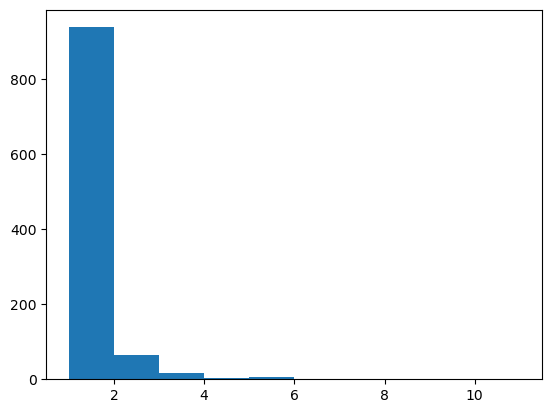

In [177]:
plt.hist(out_orders['transactionId'])

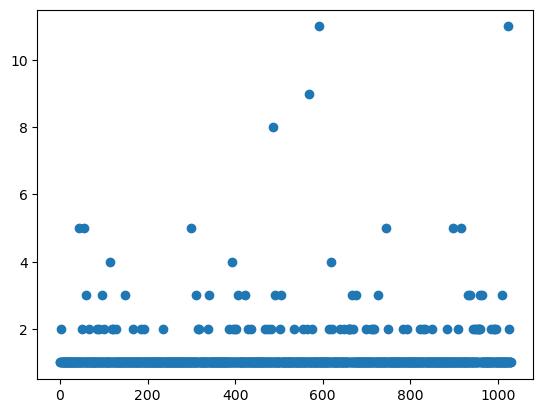

In [178]:
apoio_eixoX_out_orders = pd.Series(range(0, len(out_orders)))

plt.scatter(apoio_eixoX_out_orders, out_orders['transactionId'])

Anomalias - Receita

In [179]:
print(np.percentile(orders_us['revenue'],[90,95,99]))

[282.48  435.54  900.904]


(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+00, 1.996540e+03, 3.988080e+03, 5.979620e+03,
        7.971160e+03, 9.962700e+03, 1.195424e+04, 1.394578e+04,
        1.593732e+04, 1.792886e+04, 1.992040e+04]),
 <BarContainer object of 10 artists>)

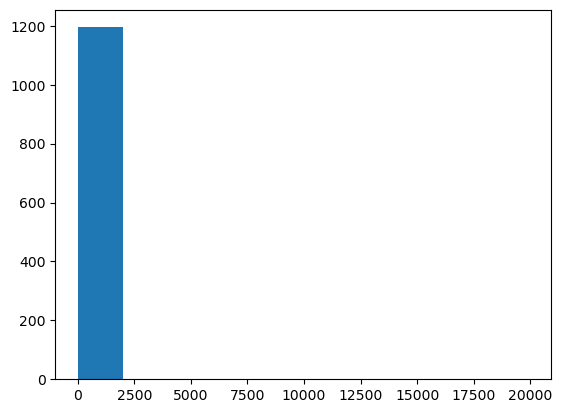

In [180]:
plt.hist(orders_us['revenue'])

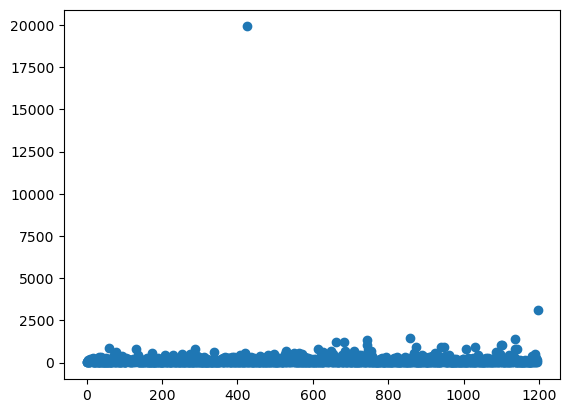

In [181]:
apoio_eixoX_out_revenue = pd.Series(range(0, len(orders_us['revenue'])))

plt.scatter(apoio_eixoX_out_revenue, orders_us['revenue'])

Novos dataframes excluido os outliers de qtd de pedidos e receita

In [182]:
users_pedidos_out = pd.concat(
    [orders_user_A[orders_user_A['transactionId'] > 2]['visitorId'],
    orders_user_B[orders_user_B['transactionId'] > 2]['visitorId'],
    ],
    axis=0
)

users_revenue_out = orders_us[orders_us['revenue'] > 1000.0]['visitorId']


In [183]:
users_anomalias = (pd.concat(
    [users_pedidos_out,users_revenue_out],
    axis=0)
    .drop_duplicates()
    .sort_values()
)

print(users_anomalias)

1099     148427295
18       199603092
23       237748145
37       249864742
68       457167155
68       611059232
744      888512513
1103    1164614297
146     1230306981
1136    1307669133
858     1316129916
189     1614305549
425     1920142716
227     2038680547
1196    2108080724
237     2108163459
269     2378935119
278     2458001652
360     2587333274
382     2742574263
349     2988190573
424     3062433592
501     3717692402
514     3803269165
456     3908431265
467     3967698036
743     4133034833
499     4256040402
662     4266935830
Name: visitorId, dtype: int64


In [184]:
filtro_orders_A = pd.concat(
    [
        orders_user_A[
            np.logical_not(orders_user_A['visitorId'].isin(users_anomalias))]['transactionId'],
            pd.Series(
                0,
                index=np.arange(
                    visits_us[visits_us['group'] == 'A']['visits'].sum() - len(orders_user_A['visitorId'])
                ),
                name='orders',
            ),
        ],
        axis=0,
)

In [185]:
filtro_orders_B = pd.concat(
    [
        orders_user_B[
            np.logical_not(orders_user_B['visitorId'].isin(users_anomalias))]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visits_us[visits_us['group'] == 'B']['visits'].sum()
                - len(orders_user_B['visitorId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [186]:
conversao_mannwhitneyu_filtro = st.mannwhitneyu(filtro_orders_A,filtro_orders_B)
print(conversao_mannwhitneyu_filtro)
print('pvalue = ', conversao_mannwhitneyu_filtro[1])

MannwhitneyuResult(statistic=176020614.0, pvalue=0.01015327292407088)
pvalue =  0.01015327292407088


In [187]:
media_relativa_filtro = (filtro_orders_B.mean() / filtro_orders_A.mean()) - 1
print(media_relativa_filtro)

0.17394020922673525


Conclusão da conversão revisão filtrada:
    
    resultados anteriores:
    p-value = 0.017
    média de ganho relativa = 13,8%

    resultados anteriores:
    p-value = 0.010
    média de ganho relativa = 17,4%

    Com a exclusão dos valores anomalos, caiu a signifcancia estatistica do p-valor, continuando com a rejeição da hipotese nula de que os valores seriam iguais. A média aumentou, portanto o ganho relativo tambem aumentou

In [188]:
filtro_revenue_A = orders_us[
    np.logical_and(
        orders_us['group']=='A',
        np.logical_not(orders_us['visitorId'].isin(users_anomalias))
    )
]['revenue']

filtro_revenue_B = orders_us[
    np.logical_and(
        orders_us['group']=='B',
        np.logical_not(orders_us['visitorId'].isin(users_anomalias))
    )
]['revenue']

In [189]:
revenue_mannwhitneyu_filtro = st.mannwhitneyu(filtro_revenue_A,filtro_revenue_B)
print(revenue_mannwhitneyu_filtro)
print('pvalue = ', revenue_mannwhitneyu_filtro[1])

MannwhitneyuResult(statistic=146873.0, pvalue=0.8382067595014578)
pvalue =  0.8382067595014578


In [190]:
media_revenue_rel_filtro = (filtro_revenue_B.mean() / filtro_revenue_A.mean()) -1
print(media_revenue_rel_filtro)

-0.022200992810667564


Conclusão da receita:
    
    resultados anteriores:
    p-value = 0.69
    média de ganho relativa = 25,2%

    resultados anteriores:
    p-value = 0.84
    média de ganho relativa = - 2%

    O p-valor continua alto, sendo relevante estatisticamente, portanto não podemos rejeitar a hipótese nula.
    A média saiu como negativa, onde a média de receita do teste B é menor que a do teste A. 

# Conclusão Teste A/B

   Comparando as taxa de conversão, o teste B parece ter funcionado e trouxe mais clientes, independente da consideração dos Outliers ou não.
   
   Quanto a receita, o p-valor B é alto sendo relevante estatisticamente, portanto em termos de receita, o cenário A pode ser igual ao B mesmo com as alterações de exibição de sugestão de produtos. 
   Em um segundo cenário onde foram excluidos os Outliers, a receita no teste B dimuniu.
   Aqui podemos pensar em algumas possibilidades:
   1 - Apesar do aumento na quantidade de clientes, a receita não aumentou. Os custos operacionais se mantiveram na mesma proporção;
   2 - As novas compras realmente foram de produtos de maior valor, não sendo viável excluir os Outliers, mas ainda considerando que o Teste A é igual ao Teste B, não apresentando grandes mudanças de receita;

   Tendo isso em vista, a sugestão seria de parar o teste apresentando a melhora nas taxas de conversão, mas com o ponto de melhoria para publicidade de sugestão de outros produtos e talvez investigação do custo operacional.